In [3]:
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import numpy as np
from pathlib import Path

In [4]:
DATA=Path('/Users/jonniebarnsley/data/karthaus24/group11-project')

In [14]:
def assemble_isochrone(time_period, coarsen_factor=1):

    N = int(15500 / coarsen_factor)
    da = np.zeros([N, N])
    for confidence in ['high', 'med', 'low', 'very_low']:
        filepath = DATA / 'PaleoGrIS_1.0_isochrone_lines_ziparchive' / f'{time_period}_ka_{confidence}_confidence_isochrone.nc'

        try:
            file = xr.open_dataset(filepath)
        except FileNotFoundError:
            continue
        
        coarse = file.coarsen(x=coarsen_factor, y=coarsen_factor).max()
        iso = coarse.isochrone
        da = np.maximum(da, iso)
    
    return da

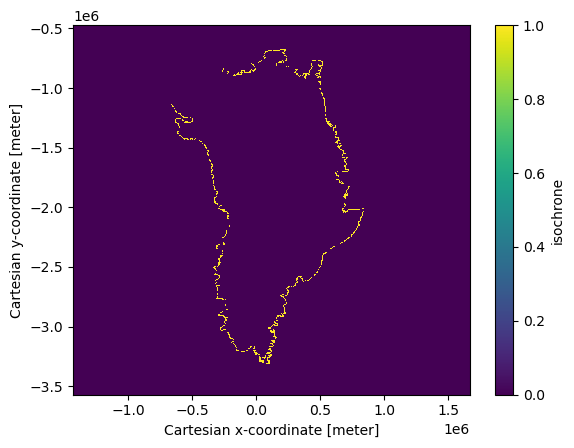

In [15]:
assemble_isochrone('10.5-10', coarsen_factor=25).plot()